In [1]:
import matplotlib.pyplot as plt
import pandas as pd

robot_data = pd.read_csv('robot_dataset.csv')
robot_data = robot_data.dropna(subset=['poster_path']).reset_index(drop=True)
robot_data['poster_path'] = robot_data['poster_path'].apply(lambda x: 'https://image.tmdb.org/t/p/w200{}'.format(x))
robot_data

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,522402,False,/oE6bhqqVFyIECtBzqIuvh6JdaB5.jpg,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://tv.apple.com/movie/umc.cmc.47dkj9f2ho3...,522402,tt3420504,en,...,2021-11-04,0,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Take an unforgettable journey.,Finch,False,8.2,1749
1,399566,False,/inJjDhCjfhh3RtrJWBmmDqeuSYC.jpg,"{'id': 535313, 'name': 'Godzilla Collection', ...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",https://www.godzillavskong.net/,399566,tt5034838,en,...,2021-03-24,467863133,113.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,One Will Fall,Godzilla vs. Kong,False,7.8,7463
2,739413,False,/AmLpWYm9R3Ur2FLPgj5CH3wR8wp.jpg,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.netflix.com/title/81038410,739413,tt13029044,en,...,2021-12-17,0,111.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,We are all programmed to survive.,Mother/Android,False,6.1,199
3,39254,False,/4f0Kj0QwPui5ydu1UavsnvP1m1o.jpg,NaN,110000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.steelgetsreal.com/,39254,tt0433035,en,...,2011-09-28,299268508,127.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If you get one shot, make it real.",Real Steel,False,6.9,6442
4,68726,False,/ig7qUy7drkEFZNCK7gi0hMn1WMN.jpg,"{'id': 363369, 'name': 'Pacific Rim Collection...",180000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://www.warnerbros.com/movies/pacific-rim,68726,tt1663662,en,...,2013-07-11,407602906,131.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"To Fight Monsters, We Created Monsters",Pacific Rim,False,6.8,10247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,161662,False,NaN,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",NaN,161662,tt0023408,en,...,1932-02-05,0,7.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Robot,False,6.5,2
443,153540,False,/gSfmF6ZtXSr8mdOUIchrwB3vPM1.jpg,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,153540,tt3641120,en,...,2013-01-01,0,7.0,[],Released,NaN,Memorize,False,5.8,4
444,88380,False,NaN,"{'id': 514732, 'name': 'The Robo-Warrior Trilo...",0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",NaN,88380,tt0416664,en,...,1989-01-01,0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Vampire Is Alive,False,5.0,2
445,34700,False,/AvV9DlR2SzG8ZGWIbIxTt9sOMWD.jpg,"{'id': 700073, 'name': 'Charlie Strapp and Fro...",0,"[{'id': 16, 'name': 'Animation'}]",NaN,34700,tt0241621,sv,...,1987-12-12,0,34.0,"[{'english_name': 'Swedish', 'iso_639_1': 'sv'...",Released,NaN,Kalle Stropp och Grodan Boll,False,5.3,2


In [2]:
text_data = robot_data[['title', 'tagline', 'overview']].dropna(subset=['overview']).fillna('')
text_data

,title,tagline,overview
0,Finch,Take an unforgettable journey.,"On a post-apocalyptic Earth, a robot, built to..."
1,Godzilla vs. Kong,One Will Fall,"In a time when monsters walk the Earth, humani..."
2,Mother/Android,We are all programmed to survive.,Georgia and her boyfriend Sam go on a treacher...
3,Real Steel,"If you get one shot, make it real.",Charlie Kenton is a washed-up fighter who reti...
4,Pacific Rim,"To Fight Monsters, We Created Monsters",A ragtag band of humans band together in the y...
...,...,...,...
442,The Robot,,Bimbo is a mechanic whose girlfriend (not Bett...
443,Memorize,,"In 2027, everyone is implanted with a chip whi..."
444,The Vampire Is Alive,,A screenwriter working on a film script in an ...
445,Kalle Stropp och Grodan Boll,,När Hönan blir bortrövad inleder de gröna uppt...


In [3]:
import string
import re
import spacy




text_data_processed = text_data.applymap(lambda x: re.sub(r'[,\'".!?]', '', x))
text_data_processed = text_data_processed.applymap(lambda x: x.lower())

for keyword in ['robot']:
    remove_string = '\w*'+keyword+'\w*'
    text_data_processed = text_data_processed.applymap(
        lambda x: re.sub(r'{}'.format(remove_string), '', x))
# remove_string = '\w*robot\w*'
    text_data_processed = text_data_processed.applymap(lambda x: re.sub(r'{}'.format(remove_string), '', x))
text_data_processed['combined'] = text_data_processed['title'] + ' ' + text_data_processed['tagline'] + ' ' + text_data_processed['overview']

text_data_processed

,title,tagline,overview,combined
0,finch,take an unforgettable journey,on a post-apocalyptic earth a built to protec...,finch take an unforgettable journey on a post-...
1,godzilla vs kong,one will fall,in a time when monsters walk the earth humanit...,godzilla vs kong one will fall in a time when ...
2,mother/android,we are all programmed to survive,georgia and her boyfriend sam go on a treacher...,mother/android we are all programmed to surviv...
3,real steel,if you get one shot make it real,charlie kenton is a washed-up fighter who reti...,real steel if you get one shot make it real ch...
4,pacific rim,to fight monsters we created monsters,a ragtag band of humans band together in the y...,pacific rim to fight monsters we created monst...
...,...,...,...,...
442,the,,bimbo is a mechanic whose girlfriend (not bett...,the bimbo is a mechanic whose girlfriend (no...
443,memorize,,in 2027 everyone is implanted with a chip whic...,memorize in 2027 everyone is implanted with a...
444,the vampire is alive,,a screenwriter working on a film script in an ...,the vampire is alive a screenwriter working o...
445,kalle stropp och grodan boll,,när hönan blir bortrövad inleder de gröna uppt...,kalle stropp och grodan boll när hönan blir b...


In [4]:
import gensim
from gensim.models import phrases
from gensim.utils import simple_preprocess
import nltk

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data = text_data_processed['combined'].values.tolist()
print(len(data))

data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words)

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10)  # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

data_words = [bigram_model[doc] for doc in data_words]
data_words = [trigram_model[bigram_model[doc]] for doc in data_words]

# nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
data_words = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

len(data_words)


444
[['finch', 'take', 'unforgettable', 'journey', 'post', 'apocalyptic', 'earth', 'built', 'protect', 'life', 'dying', 'creators', 'beloved', 'dog', 'learns', 'life', 'love', 'friendship', 'means', 'human'], ['godzilla', 'vs', 'kong', 'one', 'fall', 'time', 'monsters', 'walk', 'earth', 'humanity', 'fight', 'future', 'sets', 'godzilla', 'kong', 'collision', 'course', 'see', 'two', 'powerful', 'forces', 'nature', 'planet', 'collide', 'spectacular', 'battle', 'ages'], ['mother', 'android', 'programmed', 'survive', 'georgia', 'boyfriend', 'sam', 'go', 'treacherous', 'journey', 'escape', 'country', 'caught', 'unexpected', 'war', 'artificial', 'intelligence', 'days', 'away', 'arrival', 'first', 'child', 'couple', 'must', 'face', 'man', 'land', 'stronghold', 'android', 'uprising', 'hopes', 'reaching', 'safety', 'giving', 'birth'], ['real', 'steel', 'get', 'one', 'shot', 'make', 'real', 'charlie', 'kenton', 'washed', 'fighter', 'retired', 'ring', 'took', 'sport', 'trashed', 'reluctantly', 'te

444

In [5]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


In [6]:
from pprint import pprint

# number of topics
num_topics = 12
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.008*"human" + 0.007*"year" + 0.006*"create" + 0.006*"world" + 0.006*"boy" '
  '+ 0.006*"film" + 0.005*"planet" + 0.005*"first" + 0.005*"scientist" + '
  '0.005*"find"'),
 (1,
  '0.007*"human" + 0.007*"monster" + 0.006*"earth" + 0.006*"child" + '
  '0.006*"future" + 0.005*"make" + 0.005*"time" + 0.005*"plan" + '
  '0.004*"friend" + 0.004*"attack"'),
 (2,
  '0.008*"world" + 0.007*"man" + 0.006*"help" + 0.006*"machine" + 0.005*"toy" '
  '+ 0.005*"town" + 0.005*"life" + 0.005*"year" + 0.005*"new" + 0.005*"lose"'),
 (3,
  '0.009*"human" + 0.006*"man" + 0.005*"earth" + 0.005*"world" + 0.005*"s" + '
  '0.004*"war" + 0.004*"future" + 0.004*"planet" + 0.004*"live" + '
  '0.004*"mankind"'),
 (4,
  '0.011*"earth" + 0.008*"human" + 0.007*"world" + 0.007*"man" + 0.007*"space" '
  '+ 0.005*"get" + 0.004*"girl" + 0.004*"new" + 0.004*"power" + 0.004*"band"'),
 (5,
  '0.009*"earth" + 0.009*"new" + 0.007*"power" + 0.006*"future" + '
  '0.006*"machine" + 0.006*"world" + 0.005*"destroy" + 0.005*

In [7]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\users\marti\pycharmprojects\film-data-explorer\venv\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.056720 -0.025476       1        1  14.649848
6     -0.007643  0.036344       2        1  12.612899
7     -0.033322 -0.086279       3        1   9.809232
10    -0.016590 -0.020971       4        1   8.435981
2     -0.092352  0.079684       5        1   8.228391
1      0.012571 -0.071647       6        1   7.877640
3     -0.026819  0.024619       7        1   7.348187
5      0.022914 -0.014251       8        1   7.346056
4      0.029350  0.053908       9        1   7.085869
0      0.027407 -0.005345      10        1   6.530258
9      0.034206 -0.003753      11        1   5.299242
11     0.106998  0.033168      12        1   4.776397, topic_info=        Term       Freq      Total Category  logprob  loglift
1663   shark   9.000000   9.000000  Default  30.0000  30.0000
525   father  24.000000  24.000000  Default  29.0000  29.0000
8      human  71.000000  71.000000  Default  28.0000  28.0000
25    future  42.000000  42.000000  Default  27.0000  27.0000
270    world  73.000000  73.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
1389  invent   1.523874   8.367803  Topic12  -5.9674   1.3383
178        s   1.735702  27.746730  Topic12  -5.8372   0.2698
202   follow   1.612359  18.916002  Topic12  -5.9109   0.5792
270    world   1.538640  73.597999  Topic12  -5.9577  -0.8262
16      take   1.532466  48.907835  Topic12  -5.9618  -0.4216

[924 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1812      1  0.326494    abduct
1812      9  0.326494    abduct
623       3  0.646564     abide
818       1  0.193027   ability
818       2  0.193027   ability
...     ...       ...       ...
298      11  0.038435     young
298      12  0.038435     young
718       8  0.456371   zathura
2732      8  0.696675  zegapain
148       7  0.663858      zion

[2176 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 8, 11, 3, 2, 4, 6, 5, 1, 10, 12])

In [8]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word,
                                                 coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Topic Coherence Score: ', coherence_lda)
print('Perplexity Score (lower the better): ',
                     lda_model.log_perplexity(corpus))

Topic Coherence Score:  0.27827565444559127
Perplexity Score (lower the better):  -8.624571685754463


In [9]:
# setup: get the model's topics in their native ordering...
all_topics = lda_model.print_topics()
# ...then create a empty list per topic to collect the docs:
docs_per_topic = [[] for _ in all_topics]

# now, for every doc...
for doc_id, doc_bow in enumerate(corpus):
    # ...get its topics...
    doc_topics = lda_model.get_document_topics(doc_bow)
    # ...& for each of its topics...
    for topic_id, score in doc_topics:
        # ...add the doc_id & its score to the topic's doc list
        docs_per_topic[topic_id].append((doc_id, score))

[285, 167, 416, 257, 82, 16, 77, 93, 197, 281]
title           Probable Robot
release_date        2015-09-01
Name: 285, dtype: object
title           Mystery Science Theater 3000: The Movie
release_date                                 1996-04-19
Name: 167, dtype: object
title            Space War
release_date    1997-01-01
Name: 416, dtype: object
title           Malice@Doll
release_date     2001-04-27
Name: 257, dtype: object
title           P3K: Pinocchio 3000
release_date             2004-05-14
Name: 82, dtype: object
title           Alien: Covenant
release_date         2017-05-09
Name: 16, dtype: object
title           Forbidden Planet
release_date          1956-03-23
Name: 77, dtype: object
title           The Haunted World of El Superbeasto
release_date                             2009-09-12
Name: 93, dtype: object
title           Ikarie XB 1
release_date     1963-07-01
Name: 197, dtype: object
title           Almost Human
release_date      2019-03-21
Name: 281, dtype: object


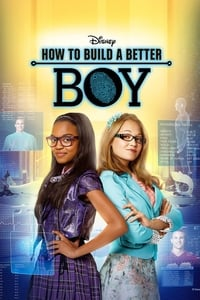

In [10]:
from IPython.display import Image

for doc_list in docs_per_topic:
    doc_list.sort(key=lambda id_and_score: id_and_score[1], reverse=True)

# print(docs_per_topic[0][:20])

top_ten_ids = []
for tup in docs_per_topic[0][:10]:
    top_ten_ids.append(tup[0])
print(top_ten_ids)

robot_data
for id in top_ten_ids:
    print(robot_data.loc[id, ['title', 'release_date']])

Image(robot_data.loc[90, 'poster_path'])



1 --> 0.15969307827025286
2 --> 0.23187402886972835
3 --> 0.22822653865118422
4 --> 0.22664160079998213
5 --> 0.26411699630770685
6 --> 0.2758265897749559
7 --> 0.2441936629355532
8 --> 0.2673379876006128
9 --> 0.25045242638418563
10 --> 0.2867005212129121
11 --> 0.2758653723069706
12 --> 0.3267179174429991
13 --> 0.3067122415563692
14 --> 0.31938306962124213
15 --> 0.3207006720179832
16 --> 0.3001870747433014
17 --> 0.3281226720483459
18 --> 0.32110330221274697
19 --> 0.30824321363920554


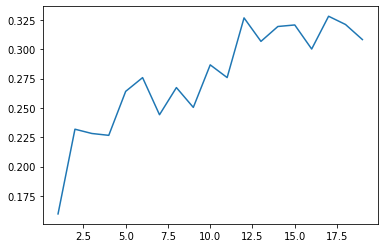

In [11]:
coherence_scores = []
for k in range(1,20):
    num_topics = k
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=data_words,
                                         dictionary=id2word,
                                         coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)
    print(k,'-->', coherence_lda)

plt.plot(range(1,20), coherence_scores)
plt.show()

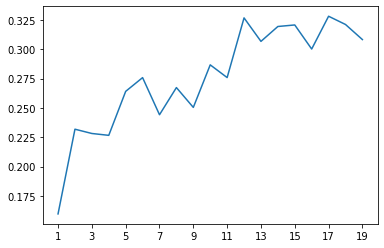

In [12]:
plt.plot(range(1,20), coherence_scores)
plt.xticks(range(1,20,2))
plt.show()